In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [131]:
img = cv2.imread("Cat.jpg")

In [132]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

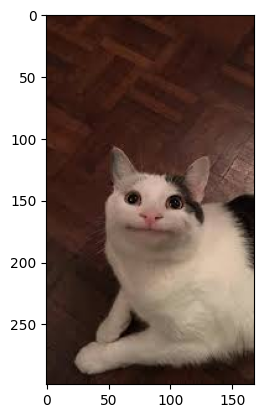

In [133]:
plt.imshow(img)

In [134]:
row, col, ch = img.shape

### Noisy images

In [135]:
intensities = [0.5, 1.0, 1.5]
noisy_imgs = []

In [136]:
for i,intensity in enumerate(intensities):
    std = intensity
    noise = np.random.normal(mean, std, (row, col, ch))
    noisy_img = cv2.add(img, noise.astype(np.uint8))
    noisy_imgs.append(noisy_img)
# noisy_img = np.clip(noisy_img, 0, 255)
# noisy_img = cv2.cvtColor(noisy_img, cv2.COLOR_RGB2BGR)

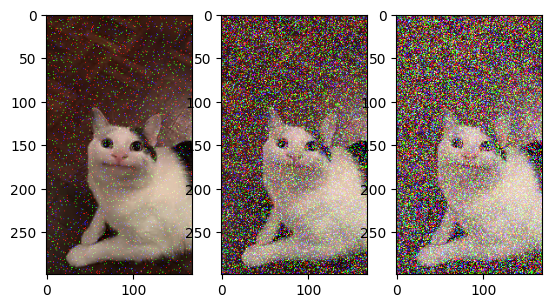

In [137]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(noisy_imgs[i])
# plt.show()

### Blurred images

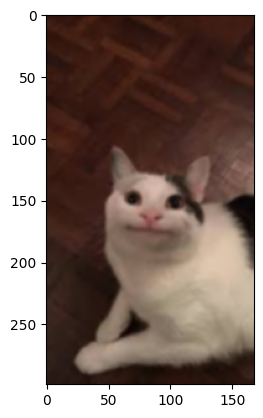

In [175]:
#Gaussian Blur
blur_img1 = cv2.GaussianBlur(img, (5,5), 0)
plt.imshow(blur_img1)

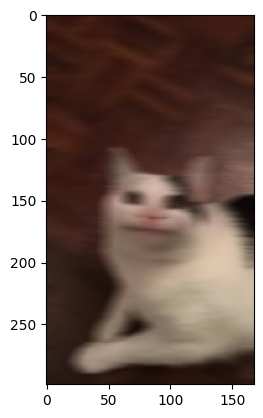

In [141]:
#Motion Blur
motion_blur = np.zeros((15,15))
motion_blur[7,:] = np.ones(15)
motion_blur = motion_blur / 15
blur_img2 = cv2.filter2D(img, -1, motion_blur)
plt.imshow(blur_img2)

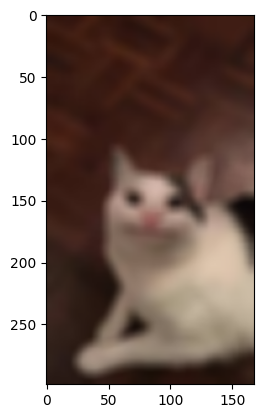

In [146]:
#Using blur to simulate defocus blur
blur_img3 = cv2.blur(img, (10,10))
plt.imshow(blur_img3)

In [176]:
blur_imgs = []
blur_imgs.extend([blur_img1,blur_img2,blur_img3])

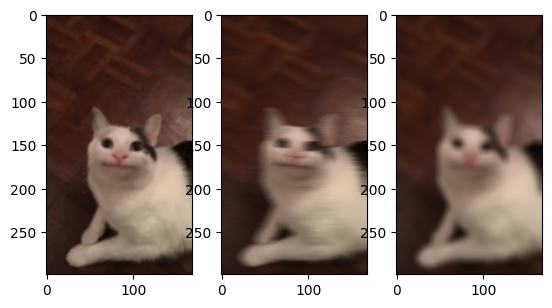

In [177]:
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(blur_imgs[i])

### PSNR (Peak Signal to Noise Ratio)

In [148]:
from math import log10, sqrt 

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

In [172]:
for i in range(3):
    value = PSNR(img, noisy_imgs[i])
    print("PSNR Value of Noisy image", i+1,"with original image:",value)
for i in range(3):
    value = PSNR(img, blur_imgs[i])
    print("PSNR Value of Blurry image", i+1,"with original image:",value)

PSNR Value of Noisy image 1 with original image: 44.305462669595016
PSNR Value of Noisy image 2 with original image: 35.597042939356655
PSNR Value of Noisy image 3 with original image: 33.598102652915564
PSNR Value of Blurry image 1 with original image: 39.8825570217518
PSNR Value of Blurry image 2 with original image: 34.11766652457531
PSNR Value of Blurry image 3 with original image: 33.742031450621795


### SSIM (Structural Similarity Index Measure)

In [152]:
from skimage import metrics

In [171]:
for i in range(3):
    value = metrics.structural_similarity(img, noisy_imgs[i], channel_axis=2)
    print("SSIM Value of Noisy image", i+1,"with original image:",value)
for i in range(3):
    value = metrics.structural_similarity(img, blur_imgs[i], channel_axis=2)
    print("SSIM Value of Blurred image", i+1,"with original image:",value)

SSIM Value of Noisy image 1 with original image: 0.47770347179469513
SSIM Value of Noisy image 2 with original image: 0.07402809028584
SSIM Value of Noisy image 3 with original image: 0.04977142673459028
SSIM Value of Blurred image 1 with original image: 0.9744420302149003
SSIM Value of Blurred image 2 with original image: 0.84671322556011
SSIM Value of Blurred image 3 with original image: 0.8277847908125429


### LPIPS(Learned Perceptual Image Patch Similarity)

In [157]:
import lpips
loss_fn_alex = lpips.LPIPS(net='alex') # closer to "traditional" perceptual loss, when used for optimization
import torch

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


c:\Users\Anantha\miniconda3\envs\gputorch\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Anantha\miniconda3\envs\gputorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\Anantha/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:46<00:00, 5.29MB/s] 


Loading model from: c:\Users\Anantha\miniconda3\envs\gputorch\lib\site-packages\lpips\weights\v0.1\alex.pth


In [170]:
from lpips import LPIPS
import torch
loss_fn = LPIPS(net='alex')

for img_type, images in [('Noisy', noisy_imgs), ('Blurred', blur_imgs)]:
    for i, image in enumerate(images):
        o_img = torch.from_numpy(img.transpose((2, 0, 1))).float()
        image = torch.from_numpy(image.transpose((2, 0, 1))).float()
        lpips_value = loss_fn.forward(image, o_img).item()
        print("LPIPS Value of",img_type, "image", i+1,"with original image:",lpips_value)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: c:\Users\Anantha\miniconda3\envs\gputorch\lib\site-packages\lpips\weights\v0.1\alex.pth
LPIPS Value of Noisy image 1 with original image: 0.49326807260513306
LPIPS Value of Noisy image 2 with original image: 0.8376483917236328
LPIPS Value of Noisy image 3 with original image: 0.8983475565910339
LPIPS Value of Blurred image 1 with original image: 0.04477987438440323
LPIPS Value of Blurred image 2 with original image: 0.1426093876361847
LPIPS Value of Blurred image 3 with original image: 0.17234109342098236
